#### importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### loading data

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\python\Exam_score_predictor_using_ML\Data\student_habits_performance.csv")


### Exploring the Data 
#### Trying to understand all the features 

In [6]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [7]:
df.size

16000

In [8]:
df.shape

(1000, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [10]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
## Warning do not execute this 

# Hustling = (df['part_time_job'] == "Yes").sum()
# not_Hustling = df['part_time_job'].count() - Hustling
# print(f"Hustling : {Hustling}\nNot Hustling : {not_Hustling}")

In [13]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [14]:
# Justification for Data Handling:
# ------------------------------
# Deleting null values in 'parental_education_level' instead of imputation.
# Rationale: This feature is highly predictive of student success, and 
# simple imputation (e.g., Mode) could introduce significant bias or inaccurate 
# relationships, especially since the missing rate is low (9.1% of 1000 records).
# The loss of 91 rows is deemed acceptable to maintain data integrity and avoid 
# making an unfounded assumption about the missing education levels.
df.dropna(subset=['parental_education_level'], inplace=True)

In [15]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor'], dtype=object)

In [16]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [17]:
print("Current Shape of the dataframe: ",df.shape)
print("Current Size of the dataframe: ",df.size)


Current Shape of the dataframe:  (909, 16)
Current Size of the dataframe:  14544


In [18]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [19]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [20]:
# descrbe categorical data
df.describe(include='object')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [21]:
df.describe(include='object').columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [22]:
categorical_col = ['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

In [23]:
for col in categorical_col:
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")

Value Counts for gender:
gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

Value Counts for part_time_job:
part_time_job
No     713
Yes    196
Name: count, dtype: int64

Value Counts for diet_quality:
diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64

Value Counts for parental_education_level:
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

Value Counts for internet_quality:
internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64

Value Counts for extracurricular_participation:
extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64



# --- Data Preparation and Cleaning Summary (Initial State: 1000 Records) ---

### 1. Dataset Shape:
- Initial shape was **(1000, 16)**.  
- → Target Variable: **'exam_score'**

### 2. Handling Missing Data:
- → Feature: **'parental_education_level'** contained **91 null values (9.1%)**.  
- → Action: Rows with null values in this critical feature were **dropped** to maintain data integrity and avoid bias from imputation.

### 3. Post-Cleaning Status:
- → New Dataset Shape: **(909, 16)**

### 4. Subsequent Analysis:
- → **Numerical Features:** Examined basic descriptive statistics (Mean, Median, Mode).  
- → **Categorical Features:** Analyzed Value Counts, Unique values, Frequency, and Top values.

---

### --- Ready for Feature Engineering / Encoding ---


# EDA (Exploratory Data analysis)

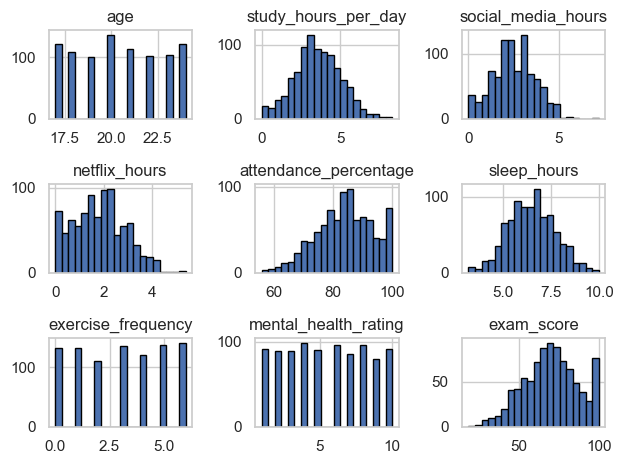

In [26]:
df.hist(bins = 20, edgecolor = 'black')
plt.tight_layout()
plt.show()

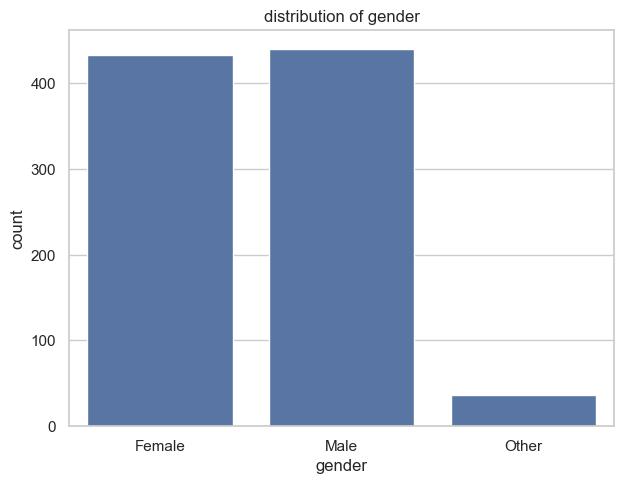

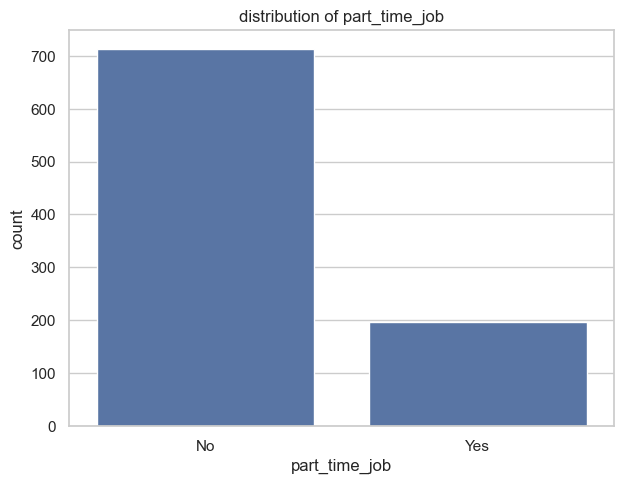

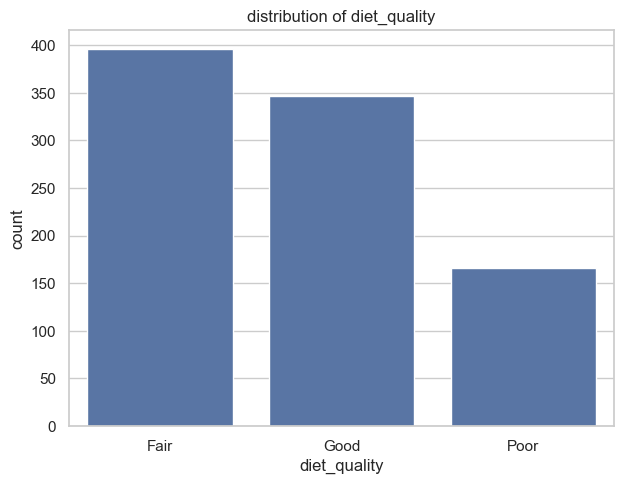

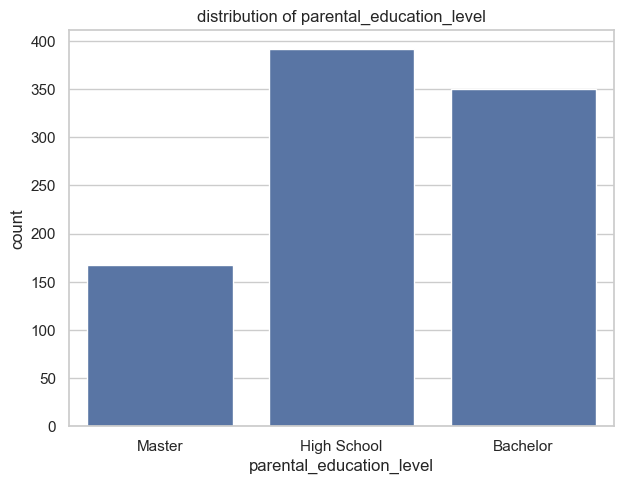

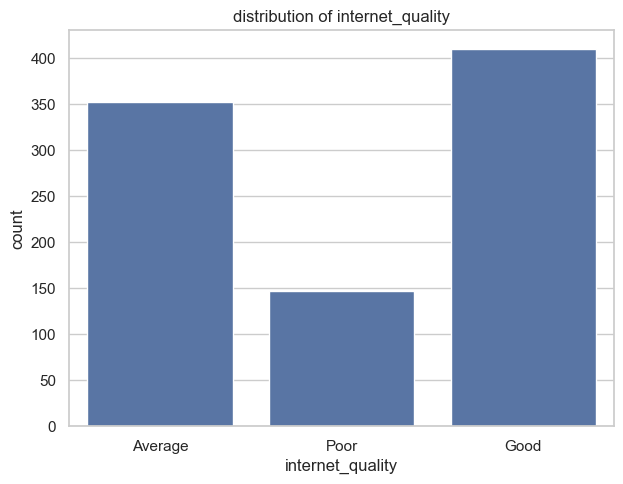

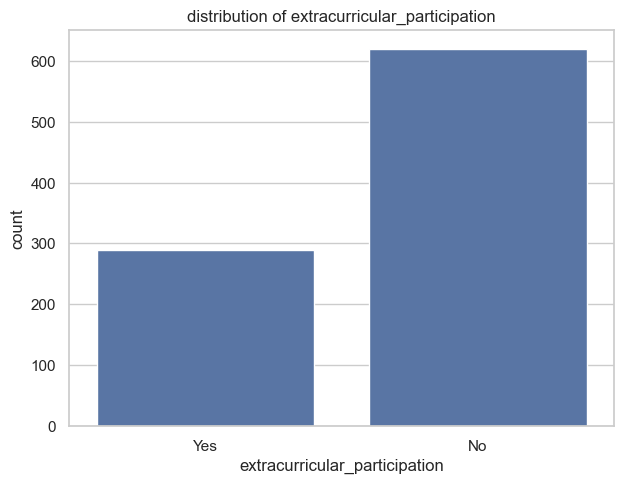

In [27]:
for col in categorical_col:
    sns.countplot(data=df, x = col)
    plt.tight_layout()
    plt.title(f"distribution of {col}")
    # plt.xticks(rotation = 45)
    plt.show()

In [28]:
df.corr(numeric_only=True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.007150,-0.023854,0.005841,-0.030203,0.040498,-0.005718,-0.052137,-0.012833
study_hours_per_day,0.007150,1.000000,0.007364,-0.014493,0.028967,-0.026241,-0.024708,-0.015896,0.822950
social_media_hours,-0.023854,0.007364,1.000000,0.011865,0.049356,0.026861,-0.023975,-0.000417,-0.171672
netflix_hours,0.005841,-0.014493,0.011865,1.000000,-0.015008,-0.017006,-0.004155,-0.016612,-0.166578
attendance_percentage,-0.030203,0.028967,0.049356,-0.015008,1.000000,0.001972,-0.010563,-0.017096,0.096005
sleep_hours,0.040498,-0.026241,0.026861,-0.017006,0.001972,1.000000,0.030013,-0.010653,0.122294
exercise_frequency,-0.005718,-0.024708,-0.023975,-0.004155,-0.010563,0.030013,1.000000,-0.001500,0.161397
mental_health_rating,-0.052137,-0.015896,-0.000417,-0.016612,-0.017096,-0.010653,-0.001500,1.000000,0.317945
exam_score,-0.012833,0.822950,-0.171672,-0.166578,0.096005,0.122294,0.161397,0.317945,1.000000


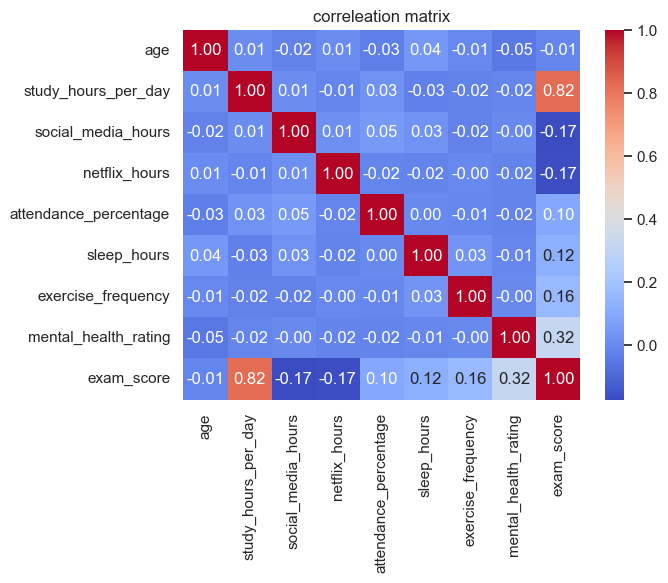

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("correleation matrix")
plt.show()

# 📈 Correlation Findings with `exam_score`

Based on the preliminary analysis (e.g., heatmap), the features demonstrate varying relationships with the target variable, `exam_score`.

---

## 1. Positive Correlates (Increase in Score)

These features show a **positive relationship** with the `exam_score`. As the values in these features increase, the exam score tends to increase:

* **Study Hours Per Day:** This is the most direct positive correlation; increased daily study time strongly leads to higher scores.
* **Attendance Percentage:** Higher class attendance is associated with improved scores.
* **Sleep Hours:** Greater hours of sleep suggest better rest, which is linked to higher academic performance.
* **Exercise Frequency:** More frequent physical activity correlates positively with scores.
* **Mental Health Rating:** Higher well-being scores indicate better mental health, which is associated with better exam results.

## 2. Negative / Neutral Correlates (Likely Decrease or No Significant Effect)

These features appear to have either a **negative or negligible** relationship with the `exam\_score`:

* **Social Media Hours:** Increased time on social media likely corresponds to lower or stagnated scores.
* **Netflix Hours:** Similar to social media, increased consumption of streaming media may negatively affect scores.
* **Age:** The relationship with age is likely neutral or potentially negative, depending on the age distribution of the students.

---

> **Summary:** The data supports that **direct academic effort** and **positive lifestyle factors** (Study Hours, Sleep, Health) are the primary drivers of better exam scores. Conversely, excessive **leisure screen time** appears to be detrimental or non-contributory.

In [31]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [32]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'] # removed exam_score


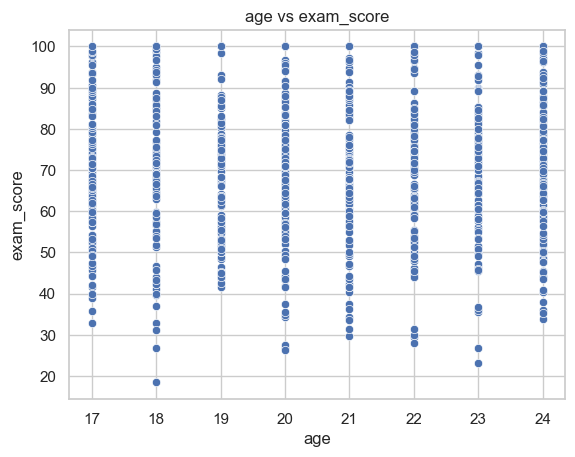

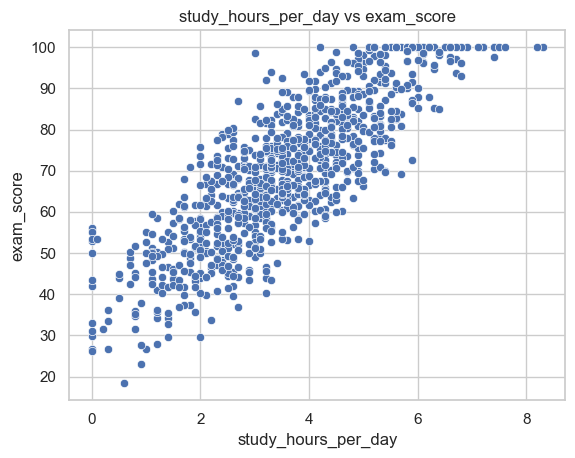

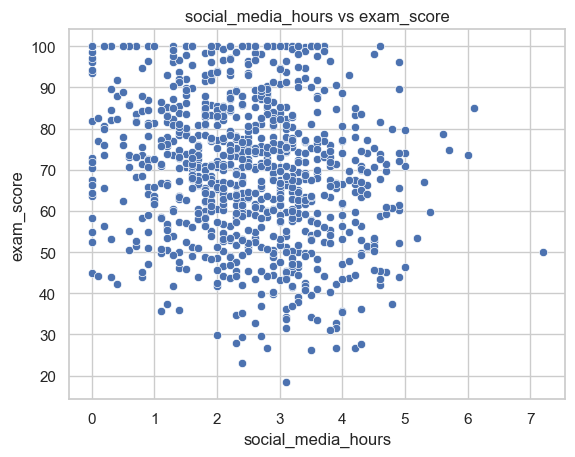

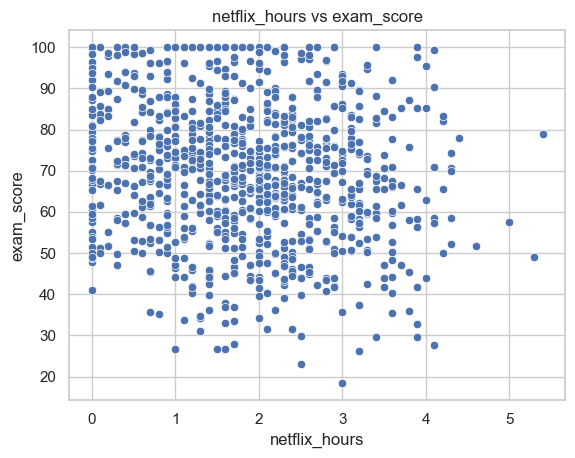

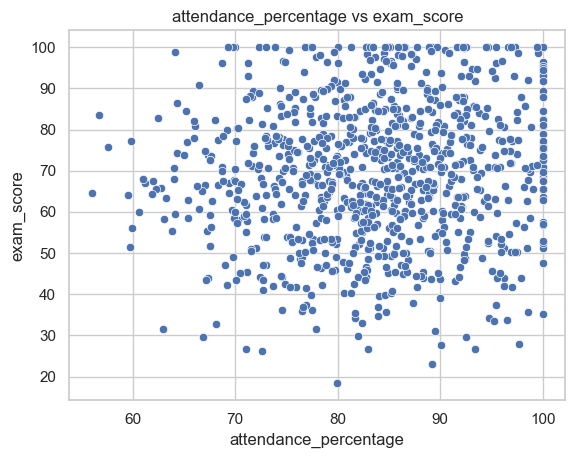

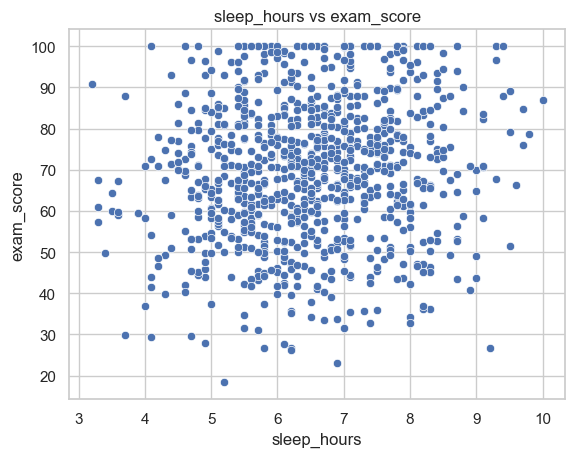

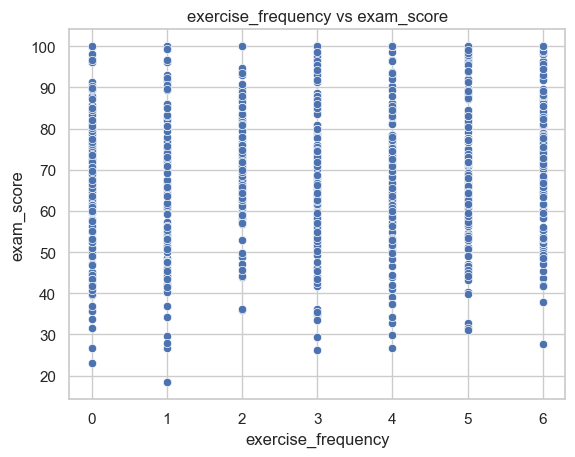

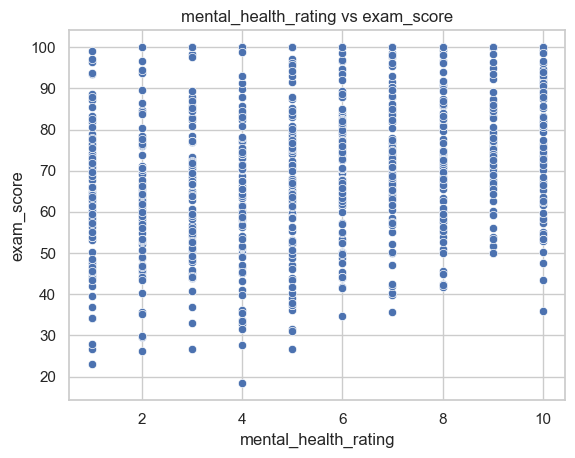

In [33]:
for feature in num_features:
    sns.scatterplot(data=df,x = feature, y='exam_score')
    plt.title(f"{feature} vs exam_score")
    plt.show()

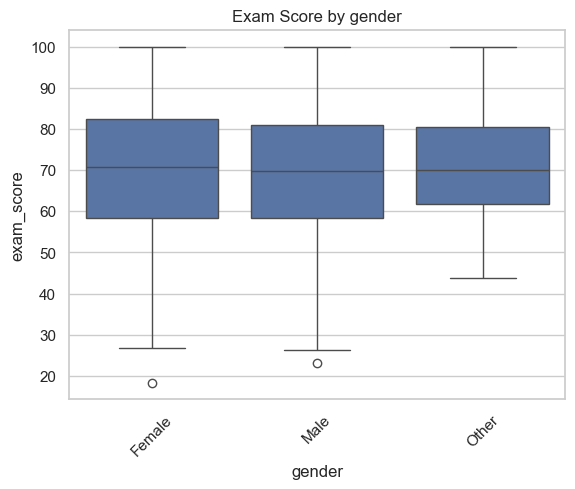

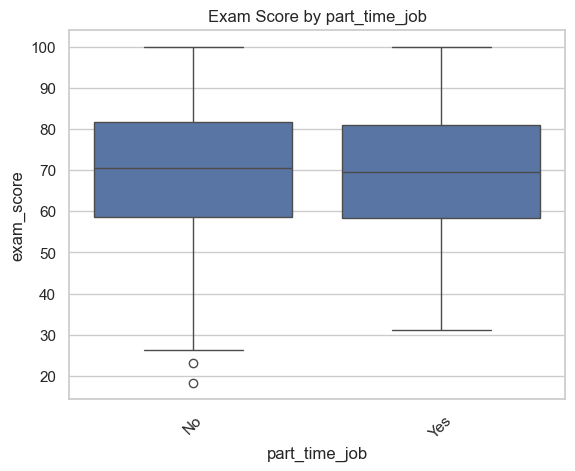

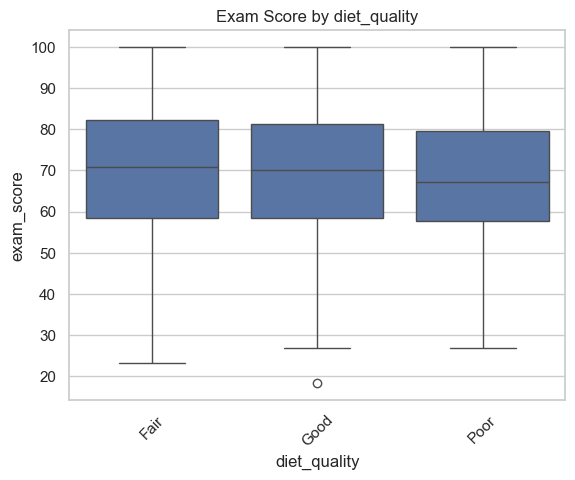

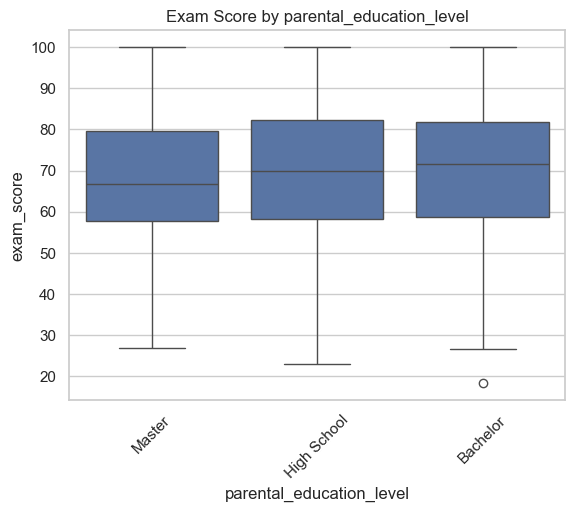

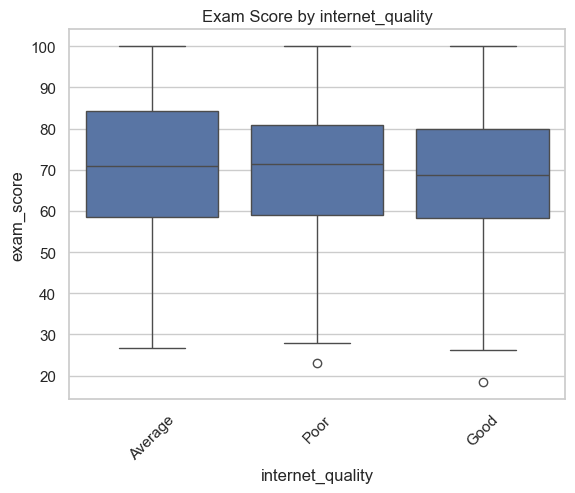

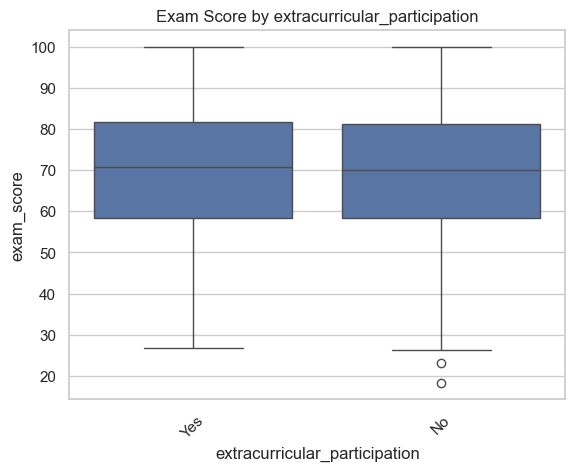

In [34]:
for col in categorical_col:
    sns.boxplot(data=df, x= col, y = "exam_score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation = 45)
    plt.show()

In [35]:
## detecting outliers
Q1 = df['exam_score'].quantile(0.25)
Q3 = df['exam_score'].quantile(0.75)
IQR = Q3 - Q1

# print(IQR)

# outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['exam_score'] < lower_bound) | (df['exam_score'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['exam_score']].head())

Number of outliers: 2
     exam_score
265        18.4
327        23.1


In [36]:
for f in num_features:
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[f] < lower_bound) | (df[f] > upper_bound)]
    if len(outliers) !=0:
        percent = (len(outliers) / len(df)) * 100
        print(f"\nFeature: {f}")
        print(f"\nNumber of outliers: {len(outliers)} ({percent:.2f}%)")
        print(outliers[[f]].head())


Feature: study_hours_per_day

Number of outliers: 3 (0.33%)
     study_hours_per_day
455                  8.3
797                  8.2
875                  7.6

Feature: social_media_hours

Number of outliers: 4 (0.44%)
     social_media_hours
346                 6.0
361                 6.1
641                 5.7
735                 7.2

Feature: netflix_hours

Number of outliers: 2 (0.22%)
     netflix_hours
556            5.4
822            5.3

Feature: attendance_percentage

Number of outliers: 3 (0.33%)
     attendance_percentage
651                   57.6
706                   56.7
971                   56.0

Feature: sleep_hours

Number of outliers: 1 (0.11%)
     sleep_hours
955         10.0


> **Outlier Handling Decision:**
>
> Rationale: All identified outliers (e.g., $8.3$ study hours, $7.2$ social media hours) are considered **plausible, valid extreme values**, not data entry errors. The percentage of outliers is very low ($<1\%$ per feature).
>
> **Action:** We will **retain** these outliers to preserve the true variance of the dataset. For modeling, we will rely on **tree-based algorithms** (like Random Forests or XGBoost), which are naturally robust to extreme values.

- Creating and storing the current dataframe into the new data file to use in feature engineering (in different notebook)

In [76]:
df.to_csv('C:/Users/Admin/Desktop/python/Exam_score_predictor_using_ML/Data/cleaned_student_data.csv', index=False)